<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.4799


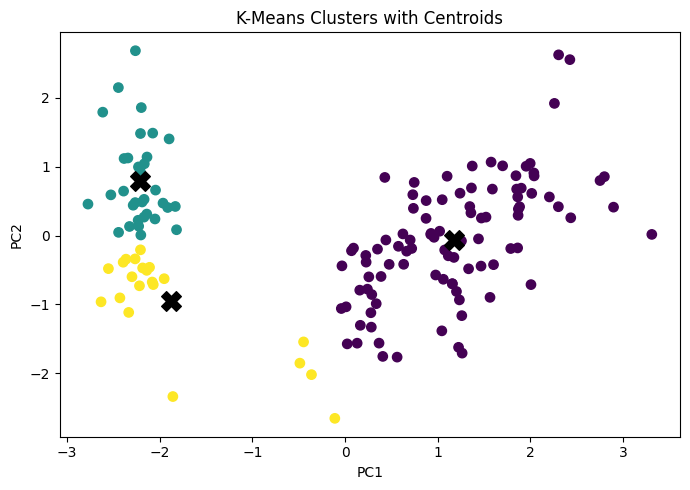

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load dataset
data = load_iris(as_frame=True)
X = data.data

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 4. PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

sil = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(sil, 4))

# 5. Plot clusters + centroids
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=45)
plt.scatter(
    centroids_pca[:,0],
    centroids_pca[:,1],
    marker='X',
    s=200,
    c='black'
)
plt.title("K-Means Clusters with Centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
